## RESTAURANT MEMBERS

**GROUP 2:**
1. Egreta Dwindra Maulida
2. Khalid Akbar Suryakusuma
3. Roy Binsar Sinaga

**ABOUT DATA**:<br>
Dataset terkait restaurant members dan order details yang tersedia di Kaggle. Dataset ini mengambil informasi dari 5 kota di Negara Israel yaitu Herzelia, Givatayim, Hasharon, Ramat Gan, Tel Aviv. Waktu pengambilan data ini dibatasi dari bulan Januari sampai Juli 2020. Dataset mencakup category, restaurant information, member information,order information, date, time, location, finance information, and more.

### 1. Problem Understanding and Definition

**Rumusan Masalah**:<br>

1. Apa tipe restoran yang paling banyak diminati penduduk di 5 kota di Israel?
2. Bagaimana persebaran jenis restoran di 5 kota di Israel?
3. Dimana kota yang paling banyak jumlah restorannya?
4. Apa tipe restoran dengan keuntungan tertinggi?
5. Bagaimana anggaran bulanan yang digunakan penduduk di 5 kota di Israel untuk makanan dari restoran?
6. Apa jenis makanan yang paling banyak disajikan di Israel?

**Terdapat 10 tabel yang memberikan informasi masing-masing sebagai berikut**:<br>
1. Dataset cities: id dari setiap kota 
2. Dataset meal_type: id dari setiap meal 
3. Dataset meals: harga, nama makanan dan lainnya
4. Dataset members: biodata pembeli dan anggaran bulanan 
5. Dataset monthly member total: biodata pembeli, anggaran bulanan, pengeluaran, saldo, dan commission
6. Dataset order details: order id dan meal id
7. Dataset orders: record tanggal, jam dan total harga pesanan seseorang
8. Dataset restaurant types: id tipe restaurant
9. Dataset restaurants: nama restaurant, pendapatan dan lokasi restaurant
10. Dataset serve_types: id jenis servis

### 2. Import library


In [101]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

In [102]:
df1=pd.read_csv('cities.csv')
df2=pd.read_csv('meal_types.csv')
df3=pd.read_csv('meals.csv')
df4=pd.read_csv('members.csv')
df5=pd.read_csv('monthly_member_totals.csv')
df6=pd.read_csv('order_details.csv')
df7=pd.read_csv('orders.csv')
df8=pd.read_csv('restaurant_types.csv')
df9=pd.read_csv('restaurants.csv')
df10=pd.read_csv('serve_types.csv')

### 3. Cek Missing values 

In [103]:
lst = ['cities.csv', 'meal_types.csv', 'meals.csv', 'members.csv', 'monthly_member_totals.csv', 'order_details.csv',
       'orders.csv', 'restaurant_types.csv', 'restaurants.csv', 'serve_types.csv']

for i in lst:
    df = pd.read_csv(i)
    df_null = pd.DataFrame(data = [df.isna().sum(), round(df.isna().sum()/df.shape[0]*100)], 
                       index=['Count', 'Percentage']).style.background_gradient(cmap='Blues')
    print('\n\033[1m' + 'Dataset ' + i +'\033[0m' )
    display(df_null)
    print('')


Dataset cities.csv


,id,city
Count,0.000000,0.000000
Percentage,0.000000,0.000000




Dataset meal_types.csv


,id,meal_type
Count,0.000000,0.000000
Percentage,0.000000,0.000000




Dataset meals.csv


,id,restaurant_id,serve_type_id,meal_type_id,hot_cold,meal_name,price
Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000




Dataset members.csv


,id,first_name,surname,sex,email,city_id,monthly_budget
Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000




Dataset monthly_member_totals.csv


,member_id,first_name,surname,sex,email,city,year,month,order_count,meals_count,monthly_budget,total_expense,balance,commission
Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000




Dataset order_details.csv


,id,order_id,meal_id
Count,0.000000,0.000000,0.000000
Percentage,0.000000,0.000000,0.000000




Dataset orders.csv


,id,date,hour,member_id,restaurant_id,total_order
Count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000




Dataset restaurant_types.csv


,id,restaurant_type
Count,0.000000,0.000000
Percentage,0.000000,0.000000




Dataset restaurants.csv


,id,restaurant_name,restaurant_type_id,income_persentage,city_id
Count,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage,0.000000,0.000000,0.000000,0.000000,0.000000




Dataset serve_types.csv


,id,serve_type
Count,0.000000,0.000000
Percentage,0.000000,0.000000


### 4. Merge

In [104]:
#menggabungkan nama depan dan belakang 
df5['full_name']=df5['first_name']+' '+df5['surname']
df5d=df5.drop(['first_name','surname'],axis=1)

#Mengubah date ke bulan 
df7['month'] = pd.DatetimeIndex(df7['date']).month
df7_grup=df7.groupby(['month','member_id','restaurant_id'])[['total_order']].sum().reset_index()

#Merge monthly_member_totals dan orders
df75=pd.merge(df5d, df7_grup, on=['member_id','month'], how='inner')

#merge df75 dengan cities
df751=pd.merge(df75,df1,on=['city'],how='inner').rename(columns={'id':'city_id'}).drop(['city'],axis=1)

#Rename 
df9_rename=df9.rename(columns={'id':'restaurant_id','city_id':'city_id_res'})

#merge dataset 751 dengan restaurant id
df7519=pd.merge(df751, df9_rename, on='restaurant_id', how='inner')
df7519_drop=df7519[['month','year','member_id','sex','city_id','monthly_budget','total_expense','balance','commission',
                'order_count','meals_count','total_order','restaurant_name','restaurant_type_id',
                  'city_id_res','income_persentage']]
df7519_drop

df1=df1.rename(columns={'id':'city_id'})
df8=df8.rename(columns={'id':'restaurant_type_id'})


df7519_drop_m=pd.merge(df7519_drop,df1,on='city_id', how='inner')
df7519_drop_=pd.merge(df7519_drop_m,df8,on='restaurant_type_id', how='inner')

df11=df1.rename(columns={'city_id':'city_id_res'})
data_=pd.merge(df7519_drop_,df11,on='city_id_res', how='inner')

data=data_.rename(columns={'city_x':'city_order','city_y':'city_res'}).drop(['restaurant_type_id','city_id_res','city_id'],axis=1)


In [105]:
data.sort_values(by='month')

,month,year,member_id,sex,monthly_budget,total_expense,balance,commission,order_count,meals_count,total_order,restaurant_name,income_persentage,city_order,restaurant_type,city_res
0,1,2020,47,F,1836.15,500.0,-1336.15,136.27950,17,37,228.46,Restaurant 1,0.075,Herzelia,Italian,Ramat Hasharon
15801,1,2020,26,F,2606.61,1000.0,-1606.61,202.05900,22,55,47.03,Restaurant 17,0.050,Herzelia,Fast Food,Ramat Gan
15802,1,2020,149,F,2594.57,600.0,-1994.57,200.58825,26,63,99.67,Restaurant 17,0.050,Herzelia,Fast Food,Ramat Gan
15803,1,2020,109,M,3385.06,800.0,-2585.06,255.77575,33,77,162.98,Restaurant 17,0.050,Herzelia,Fast Food,Ramat Gan
15804,1,2020,1,M,3773.92,1000.0,-2773.92,293.26525,38,84,53.37,Restaurant 17,0.050,Herzelia,Fast Food,Ramat Gan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16335,6,2020,15,F,2661.29,500.0,-2161.29,207.72075,29,58,39.17,Restaurant 6,0.050,Herzelia,Fast Food,Ramat Gan
16334,6,2020,57,M,3000.09,500.0,-2500.09,236.54875,29,65,78.34,Restaurant 6,0.050,Herzelia,Fast Food,Ramat Gan
16333,6,2020,46,F,2078.10,1000.0,-1078.10,171.26125,20,51,157.47,Restaurant 6,0.050,Herzelia,Fast Food,Ramat Gan
16331,6,2020,41,M,2865.71,500.0,-2365.71,229.36900,24,59,50.30,Restaurant 6,0.050,Herzelia,Fast Food,Ramat Gan


In [106]:
df8 = df8.rename(columns={'id': "restaurant_type_id"})
df89 = pd.merge(df9, df8, on='restaurant_type_id', how='inner')
df1 = df1.rename(columns={'id': "city_id"})
df_res_cit = pd.merge(df89, df1, on='city_id', how='inner')
df_res_cit

,id,restaurant_name,restaurant_type_id,income_persentage,city_id,restaurant_type,city
0,1,Restaurant 1,3,0.075,3,Italian,Ramat Hasharon
1,18,Restaurant 18,3,0.050,3,Italian,Ramat Hasharon
2,2,Restaurant 2,5,0.100,3,Indian,Ramat Hasharon
3,12,Restaurant 12,5,0.075,3,Indian,Ramat Hasharon
4,13,Restaurant 13,5,0.075,3,Indian,Ramat Hasharon
5,14,Restaurant 14,1,0.050,3,Fast Food,Ramat Hasharon
6,16,Restaurant 16,1,0.075,3,Fast Food,Ramat Hasharon
7,24,Restaurant 24,3,0.050,1,Italian,Tel Aviv
8,21,Restaurant 21,2,0.050,1,Asian,Tel Aviv
9,26,Restaurant 26,2,0.075,1,Asian,Tel Aviv


In [107]:
df7['date'] = pd.to_datetime(df7['date'])
df7['month'] = pd.DatetimeIndex(df7['date']).month
df7['hour'] = pd.to_datetime(df7['hour'])
df7['jam'] = pd.DatetimeIndex(df7['hour']).hour
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             36000 non-null  int64         
 1   date           36000 non-null  datetime64[ns]
 2   hour           36000 non-null  datetime64[ns]
 3   member_id      36000 non-null  int64         
 4   restaurant_id  36000 non-null  int64         
 5   total_order    36000 non-null  float64       
 6   month          36000 non-null  int64         
 7   jam            36000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5)
memory usage: 2.2 MB


In [108]:
df_res_cit = df_res_cit.rename(columns={'id': "restaurant_id"})

df7_rescit = pd.merge(df7, df_res_cit, on='restaurant_id', how='left')
df7_rescit

,id,date,hour,member_id,restaurant_id,total_order,month,jam,restaurant_name,restaurant_type_id,income_persentage,city_id,restaurant_type,city
0,1,2020-01-01,2023-02-24 11:00:00,25,6,0.00,1,11,Restaurant 6,1,0.050,2,Fast Food,Ramat Gan
1,2,2020-01-01,2023-02-24 11:08:00,122,4,0.00,1,11,Restaurant 4,4,0.100,4,Homemade,Herzelia
2,3,2020-01-01,2023-02-24 11:10:00,62,16,39.00,1,11,Restaurant 16,1,0.075,3,Fast Food,Ramat Hasharon
3,4,2020-01-01,2023-02-24 11:13:00,171,9,0.00,1,11,Restaurant 9,1,0.075,4,Fast Food,Herzelia
4,5,2020-01-01,2023-02-24 11:13:00,152,30,153.00,1,11,Restaurant 30,4,0.075,1,Homemade,Tel Aviv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,35996,2020-07-01,2023-02-24 23:29:00,22,14,159.82,7,23,Restaurant 14,1,0.050,3,Fast Food,Ramat Hasharon
35996,35997,2020-07-01,2023-02-24 23:33:00,44,2,92.43,7,23,Restaurant 2,5,0.100,3,Indian,Ramat Hasharon
35997,35998,2020-07-01,2023-02-24 23:34:00,199,10,46.14,7,23,Restaurant 10,4,0.100,2,Homemade,Ramat Gan
35998,35999,2020-07-01,2023-02-24 23:40:00,86,3,33.51,7,23,Restaurant 3,2,0.075,4,Asian,Herzelia


In [109]:
df7_rescit_m_gb = pd.DataFrame(df7_rescit.groupby(['jam', 'restaurant_type'])['total_order'].sum().reset_index())
df7_rescit_m_gb

,jam,restaurant_type,total_order
0,11,Asian,94205.74
1,11,Fast Food,140614.97
2,11,Homemade,50787.76
3,11,Indian,90432.76
4,11,Italian,55140.33
...,...,...,...
60,23,Asian,17523.31
61,23,Fast Food,25635.34
62,23,Homemade,9841.69
63,23,Indian,17467.99


In [110]:
df_merge = pd.DataFrame(df7_rescit.groupby(['month', 'restaurant_name', 'restaurant_type'])['total_order'].sum().reset_index())
df_merge1 = df_merge[df_merge['month'] == 1]
df_merge_1 = df_merge1.sort_values(by='total_order', ascending=False)

In [111]:
df_merge = pd.DataFrame(df7_rescit.groupby(['month', 'restaurant_name', 'restaurant_type'])['total_order'].sum().reset_index())
df_merge2 = df_merge[df_merge['month'] == 2]
df_merge_2 = df_merge2.sort_values(by='total_order', ascending=False)

In [112]:
df_merge = pd.DataFrame(df7_rescit.groupby(['month', 'restaurant_name', 'restaurant_type'])['total_order'].sum().reset_index())
df_merge3 = df_merge[df_merge['month'] == 3]
df_merge_3 = df_merge3.sort_values(by='total_order', ascending=False)

In [113]:
df_merge = pd.DataFrame(df7_rescit.groupby(['month', 'restaurant_name', 'restaurant_type'])['total_order'].sum().reset_index())
df_merge4 = df_merge[df_merge['month'] == 4]
df_merge_4 = df_merge4.sort_values(by='total_order', ascending=False)

In [114]:
df_merge = pd.DataFrame(df7_rescit.groupby(['month', 'restaurant_name', 'restaurant_type'])['total_order'].sum().reset_index())
df_merge5 = df_merge[df_merge['month'] == 5]
df_merge_5 = df_merge5.sort_values(by='total_order', ascending=False)

In [115]:
df_merge = pd.DataFrame(df7_rescit.groupby(['month', 'restaurant_name', 'restaurant_type'])['total_order'].sum().reset_index())
df_merge6 = df_merge[df_merge['month'] == 6]
df_merge_6 = df_merge6.sort_values(by='total_order', ascending=False)

In [116]:
df_merge = pd.DataFrame(df7_rescit.groupby(['month', 'restaurant_name', 'restaurant_type'])['total_order'].sum().reset_index())
df_merge7 = df_merge[df_merge['month'] == 7]
df_merge_7 = df_merge7.sort_values(by='total_order', ascending=False)

In [117]:
df4_1= pd.merge( df4,df1,  on= 'city_id',how= 'left')
df4_1.head() 

,id,first_name,surname,sex,email,city_id,monthly_budget,city
0,1,Ollie,Kinney,M,Ol.Kinney@walla.co.il,4,1000.0,Herzelia
1,2,Landon,Bishop,F,La.Bi@gmail.com,4,500.0,Herzelia
2,3,Jia,Delarosa,M,Jia.De@gmail.com,4,500.0,Herzelia
3,4,Valentina,Ratcliffe,F,Va.Ratcliffe@gmail.com,4,600.0,Herzelia
4,5,Stacie,Patel,F,St.Patel@hotmail.com,3,500.0,Ramat Hasharon


In [118]:
df9_8= pd.merge( df9,df8,  on= 'restaurant_type_id',how= 'inner')

In [119]:
df9_8_1= pd.merge( df9_8,df1,  on= 'city_id',how= 'inner')

In [120]:
df10= df10.rename(columns={'id': 'serve_type_id'})

In [121]:
df3_10= pd.merge( df3,df10,  on= 'serve_type_id',how= 'inner')

In [122]:
df2= df2.rename(columns={'id': 'meal_type_id'})

In [123]:
df3_10_2= pd.merge( df3_10,df2,  on= 'meal_type_id',how= 'inner')

In [124]:
df9_8_1= df9_8_1.rename(columns={'id': 'restaurant_id'})

In [125]:
df3_10_2_9_8_1= pd.merge( df3_10_2,df9_8_1,  on= 'restaurant_id',how= 'inner')

### 5. Visualisasi 

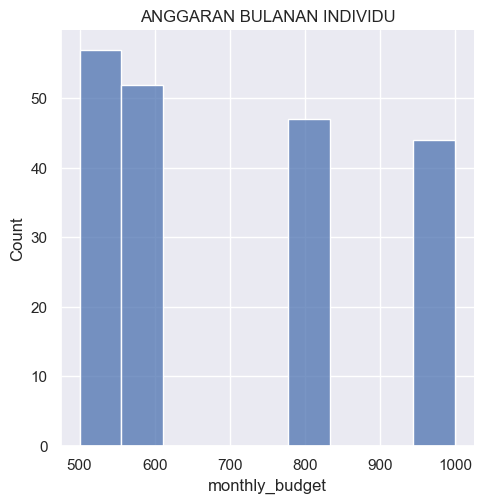

In [151]:
sns.displot(df4_1, x="monthly_budget") 
plt.title('ANGGARAN BULANAN INDIVIDU')
plt.show()

- "monthly_budget" atau anggaran bulanan yang disiapkan setiap members berkisar pada angka 500 sampai 1000.
- Lebih setengah dari total members menghabiskan 500 sampai 600 untuk anggaran makan bulanan.
- Anggaran tertinggi yang disiapkan members adalah 1000 dimana terdapat lebih dari 40 orang yang menyiapkan jumlah demikian.

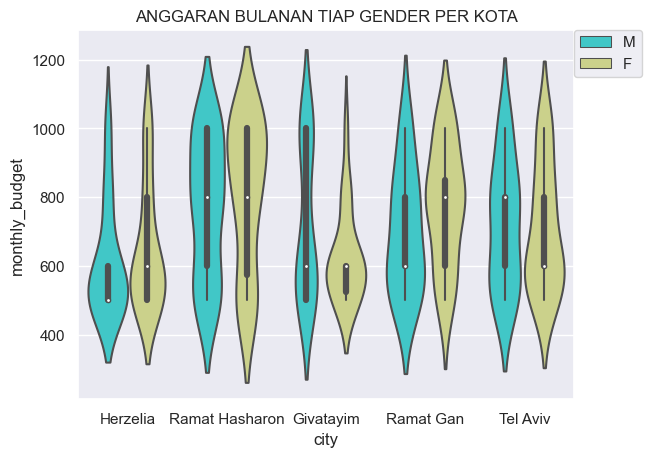

In [152]:
sns.violinplot(data=df4_1, x="city", y="monthly_budget", hue="sex", palette ='rainbow') 
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left', borderaxespad=0)
plt.title('ANGGARAN BULANAN TIAP GENDER PER KOTA')
plt.show()

- Pada kota Herzelia dapat dilihat bahwa baik pria maupun wanita memiliki monthly budget minimal yang sama yaitu 500, dimana monthly budget keduanya dominan pada kisaran 500.
- Perbedaan anatara pria dan wanita di kota Herzelia terletak pada range monthly budget dimana monthly budget pria tertinggi terletak pada angka 600 jauh dibandingkan wanita yang terdapat monthly budget hingga 1000.
- Pada kota Ramat Hasharon terdapat banyak kesamaan antara monthly budget wanita dan pria, dimana keduanya memiliki monthly budget minimal yang sama yaitu 500, lalu median sama yaitu 800 dan monthly budget tertinggi pada angka 1000, dimana angka 1000 ini juga merupakan nilai dominan bagi members di kota ini.
- Pada kota Givatayim dapat dilihat bahwa baik pria maupun wanita memiliki monthly budget manimal yang sama yaitu 500, median yang sama 600, namun bedanya range monthly budget pria lebih luas dimana budget tertinggi berada pada nilai 1000.
- Pada kota Ramat Gan  dapat dilihat bahwa persamaan wanita pria terletak pada minimal budget yang sama yaitu 500 dan maxmimal budget yang sama yaitu 1000, perbedaan terletak pada median sekaligus monthly budget dominan kedua dimana pada pria dominan pada angka 600 sedangkan wanita pada angka 800.
- Pada kota Tel Aviv persamaan yang terlihat yaitu minimal dan maximal budget yang sama, sedangkan bedanya pada pria median terletak di 800 dan bentuk violin cenderung datar yang menunjukkan persebaran monthly budget cukup merata. Sedangkan pada wanita monthly budget dominan pada angka 600.

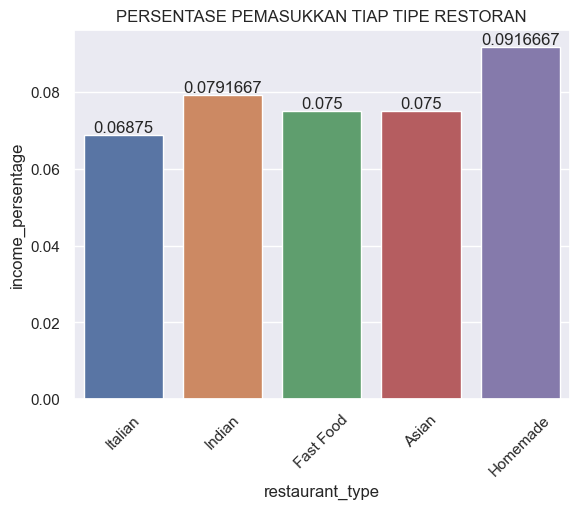

In [153]:
ax = sns.barplot(data=df9_8_1, x="restaurant_type", y="income_persentage", ci = None);
plt.xticks(rotation= 45);
ax.bar_label(ax.containers[0])
plt.title('PERSENTASE PEMASUKKAN TIAP TIPE RESTORAN')
plt.show() 

- Rata- rata persentase pendapatan tertinggi diraih oleh tipe restaurant Homemade.
- Tidak terdapat perbedaan rata-rata persentase pendapatan antar tipe resturant yang jauh selain Homemade dimana range rata-rata hanya dikasaran 0.003.

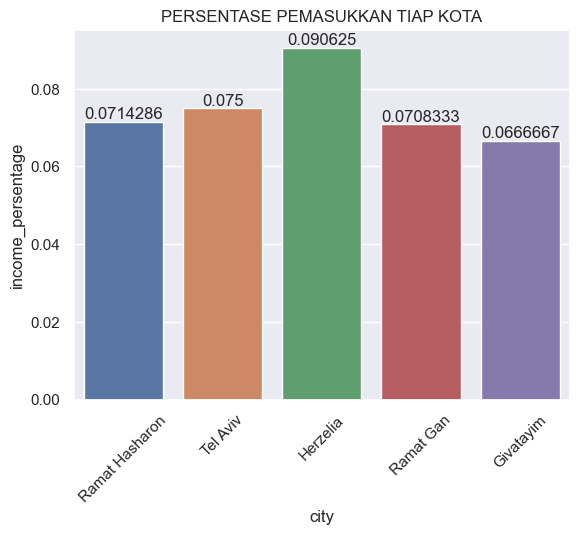

In [154]:
ax = sns.barplot(data=df9_8_1, x="city", y="income_persentage", ci = None);
plt.xticks(rotation= 45);
ax.bar_label(ax.containers[0])
plt.title('PERSENTASE PEMASUKKAN TIAP KOTA')
plt.show()

- Rata- rata persentase pendapatan tertinggi diraih oleh dari bisnis restaurant diraih oleh kota Herzelia dimana terdapat range yang lumayan tinggi jika dibandingkan kota-kota lainnya.
- Sedangkan range pendapatan pada kota lainnnya tidak jauh berbeda satu sama lainnya.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


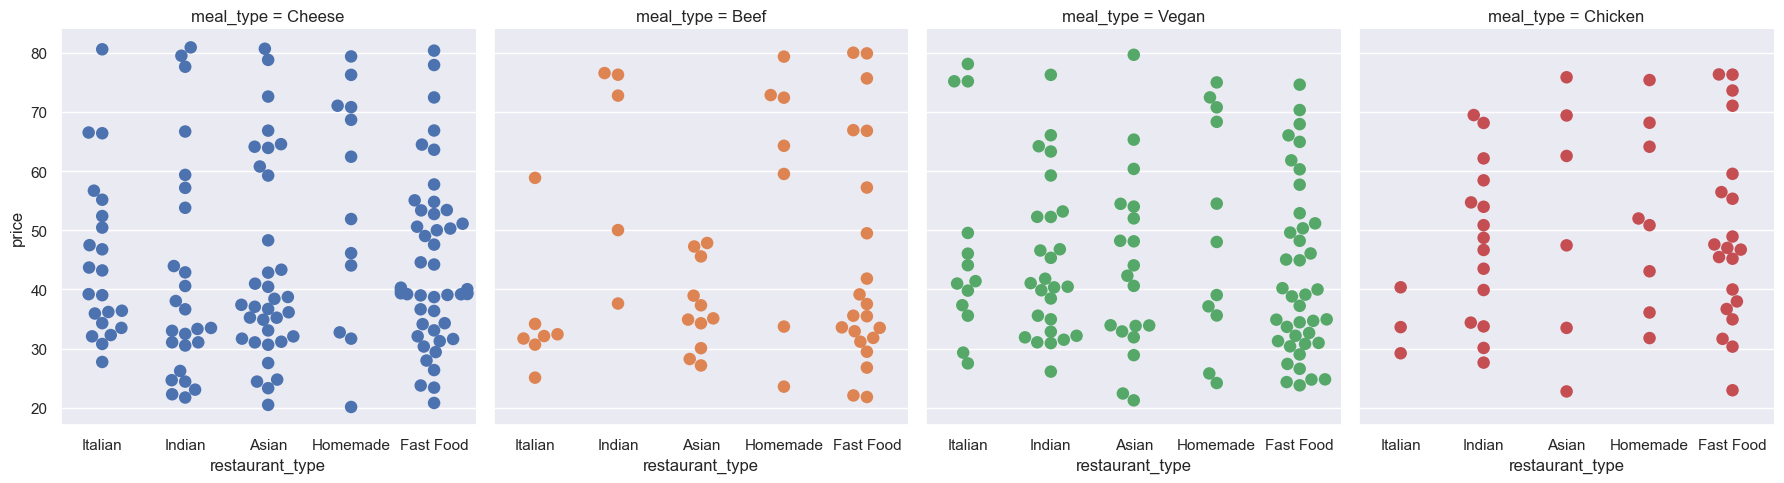

In [157]:
sns.catplot(x="restaurant_type", y="price", hue="meal_type",
            col="meal_type", aspect=.9, s=9, 
            kind="swarm", data=df3_10_2_9_8_1);
plt.show()

Keju
- Harga tertinggi jenis makanan keju pada semua tipe restoran sama yaitu 80 dimana terdapat 1 sampai 3 menu dengan harga demikian.
- Sedangkan harga terendah keju dijual di tipe restoran Asian, Homemade, dan Fast Food yaitu seharga 20 dimana terdapat 1 menu pada tiap restoran dengan harga demikian.
- Fast food merupakan tipe restoran yang paling banyak menyajikan makanan berjenis keju dimana harga menu keju dominan pada angka 40.
- Pada restoran Italian harga menu keju dominan pada harga 30an.
- Pada restoran Indian harga menu keju dominan pada harga 30an.
- Pada restoran Asian harga menu keju dominan pada harga 30-40.
- Pada restoran Home made harga menu keju dominan pada harga 70an.
- Tipe restoran yang paling sedikit menjual olahan keju adalah restoran bertipe Homemade.

Daging Sapi
- Harga tertinggi jenis makanan daging sapi terletak pada harga 80 dimana terdapat 2 restoran yang memiliki menu dengan harga 80 yaitu restoran Homemade dan Fast Fast Food 
- Sedangkan harga terendah daging sapi dijual di tipe restoran Fast Food yaitu dikasaran harga 20an.
- Fast food merupakan tipe restoran yang paling banyak menyajikan makanan berjenis daging sapi dimana harga menu daging sapi dominan pada angka 30-40.
- Pada restoran Italian harga menu daging sapi dominan pada harga 30-40.
- Pada restoran Indian harga menu daging sapi dominan pada harga 70an.
- Pada restoran Asian harga menu daging sapi dominan pada harga 30-40.
- Pada restoran Home made harga menu daging sapi dominan pada harga 70an.
- Tipe restoran yang paling sedikit menjual olahan daging sapi adalah restoran bertipe Indian.

Vegan
- Harga tertinggi jenis makanan vegan terletak pada harga 80 yaitu pada restoran tipe Asian dimana terdapat 1 menu pada harga ini.
- Sedangkan harga terendah vegan dijual di tipe restoran Asian juga yaitu seharga 20.
- Fast food merupakan tipe restoran yang paling banyak menyajikan makanan berjenis vegan dimana harga menu vegan dominan pada angka 30an.
- Pada restoran Italian harga menu vegan dominan pada harga 40.
- Pada restoran Indian harga menu vegan dominan pada harga 30-40.
- Pada restoran Asian harga menu vegan dominan pada harga 30an.
- Pada restoran Home made harga menu vegan dominan pada harga 70an.
- Tipe restoran yang paling sedikit menjual olahan vegan adalah restoran bertipe Homemade.

Ayam
- Harga tertinggi jenis makanan ayam terletak pada dibawah 80 yaitu pada restoran tipe Asian, Homemade, Fastfood dimana terdapat 1 sampai 2 menu pada harga ini.
- Sedangkan harga terendah ayam dijual di tipe restoran Asian dikisaran harga 20an.
- Fast food merupakan tipe restoran yang paling banyak menyajikan makanan berjenis ayam dimana harga menu ayam dominan pada angka 40 mendekati 50.
- Pada restoran Italian harga menu ayam dominan pada kisaran 30an.
- Pada restoran Indian harga menu ayam dominan pada harga 40-50an.
- Pada restoran Asian harga menu ayam dominan pada harga 70an.
- Pada restoran Home made harga menu ayam dominan pada harga 50an.
- Tipe restoran yang paling sedikit menjual olahan ayam adalah restoran bertipe Italian.


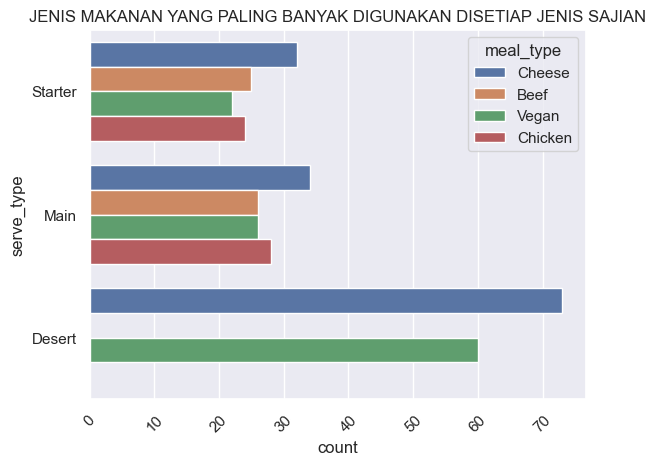

In [158]:
ax = sns.countplot(data=df3_10_2, y="serve_type", hue="meal_type")
# ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title('JENIS MAKANAN YANG PALING BANYAK DIGUNAKAN DISETIAP JENIS SAJIAN')
plt.show()

- Jenis sajian pembuka paling banyak menggunakan makanan berjenis keju, dikuti oleh daging sapi dan ayam.
- Jenis sajian utama paling banyak menggunakan makanan berjenis keju, diikuti oleh makanan jenis ayam.
- Jenis sajian pencuci mulut paling banyak menggunakan makanan berjenis keju diikuti oleh vegan.
- Tidak terdapat makanan jenis daging sapi dan ayam yang digunakan sebagai makanan pencuci mulut.
- Jenis sajian pencuci mulut memiliki variasi yang lebih banyak yaitu dari kisaran 60 sampai 70an, dimana berbeda jauh range nya dengan jenis sajian pembuka dan utama.

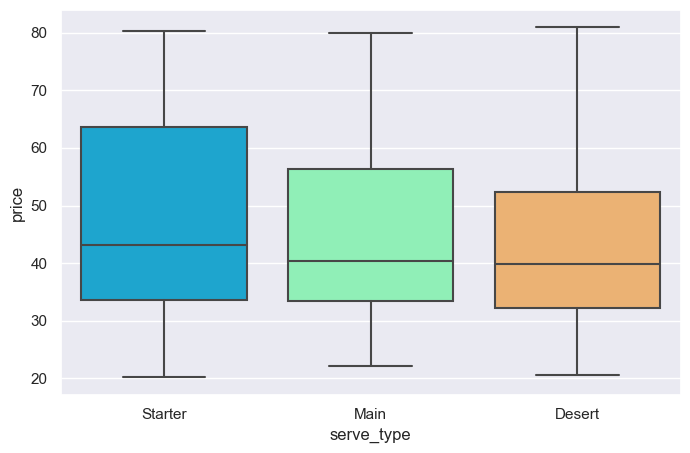

In [139]:
plt.figure(figsize=(8,5))
sns.boxplot(x='serve_type',y='price',data=df3_10_2, palette='rainbow')
plt.show()

#### - Jenis sajian pembuka memiliki harga terendah 20 dan tertinggi 80an.
- Harga jenis sajian pembuka dominan pada range 30an sampai 60 an.
- Jenis sajian utama memiliki harga terendah 20an dan tertinggi 80.
- Harga jenis sajian pembuka dominan pada range 30an sampai 50an.
- Jenis sajian pencuci mulut memiliki harga terendah 20 an dan tertinggi 80an.
- Harga jenis sajian pencuci mulut dominan pada range 30an sampai 50 an.
- Terlihat bahwa jenis sajian pencuci mulut memiliki range harga yang lebih rendah.

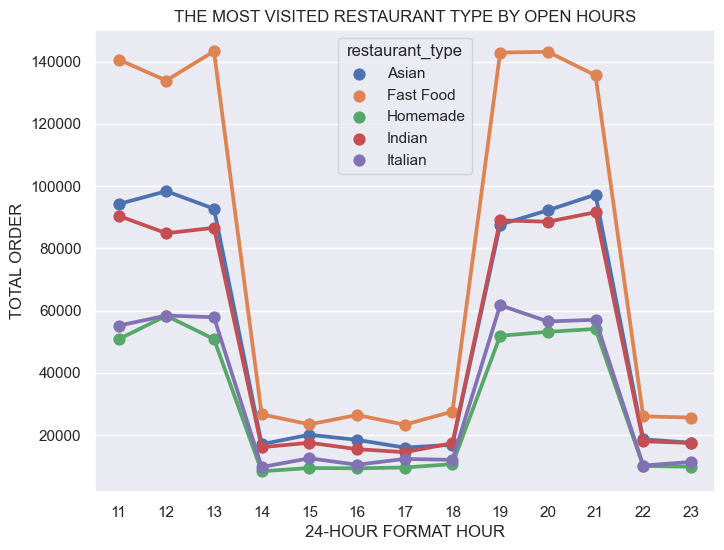

In [140]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df7_rescit_m_gb, x="jam", y="total_order", hue='restaurant_type')
plt.title('THE MOST VISITED RESTAURANT TYPE BY OPEN HOURS')
plt.xlabel('24-HOUR FORMAT HOUR')
plt.ylabel('TOTAL ORDER')
plt.show()

 - Restaurant fastfood masih menjadi pilihan bagi customer di sample kota di Israel sebagaimana kondisi di kota-kota negara lain
 - Makanan fastfood menjadi makanan favorit dapat dikarenakan banyak faktor seperti harganya yang lebih murah dari makanan non-fastfood, kecepatan penyajian kepada pelanggan, menjamurnya gerai fastfood dibanyak tempat, dan kemudahan kustomisasi makanan mereka

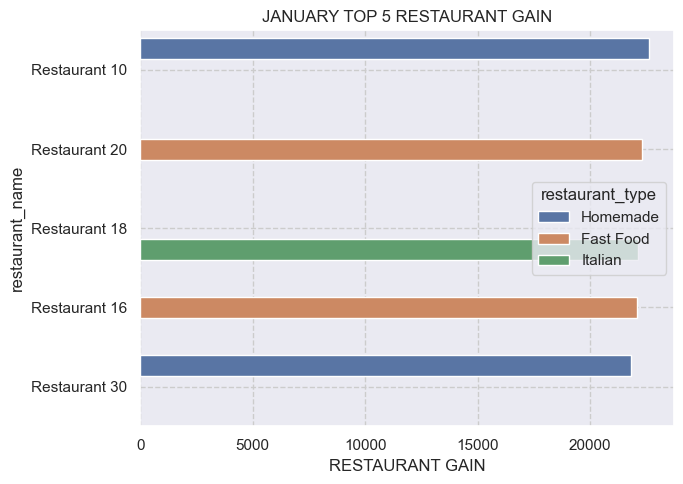

In [141]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(data=df_merge_1.head(5), x="total_order", y="restaurant_name", hue='restaurant_type', ci=None, orient='h')
plt.title('JANUARY TOP 5 RESTAURANT GAIN')
plt.xlabel('RESTAURANT GAIN')
plt.tight_layout()
plt.grid(True)
plt.show()

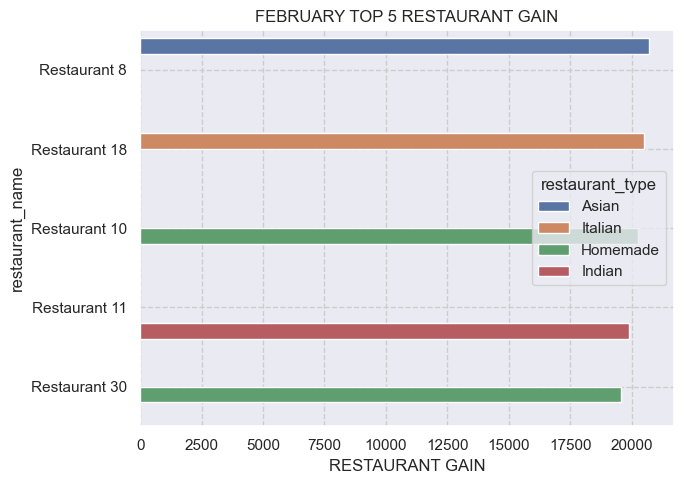

In [142]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(data=df_merge_2.head(5), x="total_order", y="restaurant_name", hue='restaurant_type', ci=None, orient='h')
plt.title('FEBRUARY TOP 5 RESTAURANT GAIN')
plt.xlabel('RESTAURANT GAIN')
plt.tight_layout()
plt.grid(True)
plt.show()

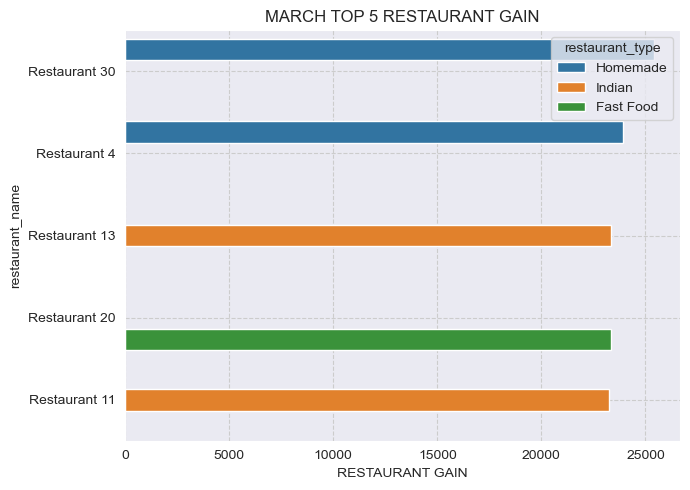

In [36]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(data=df_merge_3.head(5), x="total_order", y="restaurant_name", hue='restaurant_type', ci=None, orient='h')
plt.title('MARCH TOP 5 RESTAURANT GAIN')
plt.xlabel('RESTAURANT GAIN')
plt.tight_layout()
plt.grid(True)
plt.show()

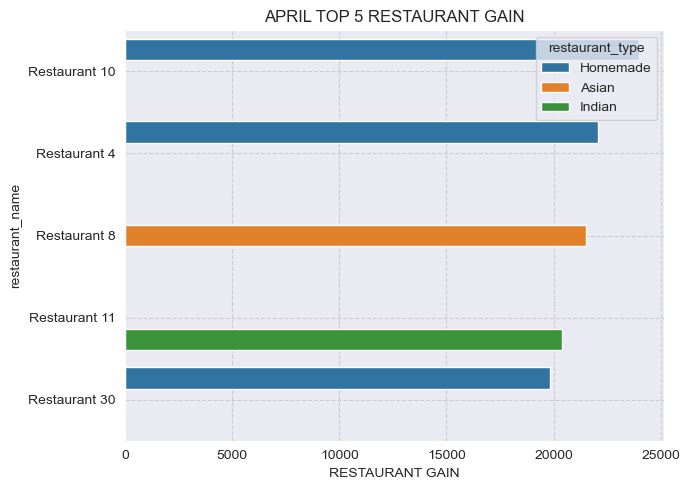

In [37]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(data=df_merge_4.head(5), x="total_order", y="restaurant_name", hue='restaurant_type', ci=None, orient='h')
plt.title('APRIL TOP 5 RESTAURANT GAIN')
plt.xlabel('RESTAURANT GAIN')
plt.tight_layout()
plt.grid(True)
plt.show()

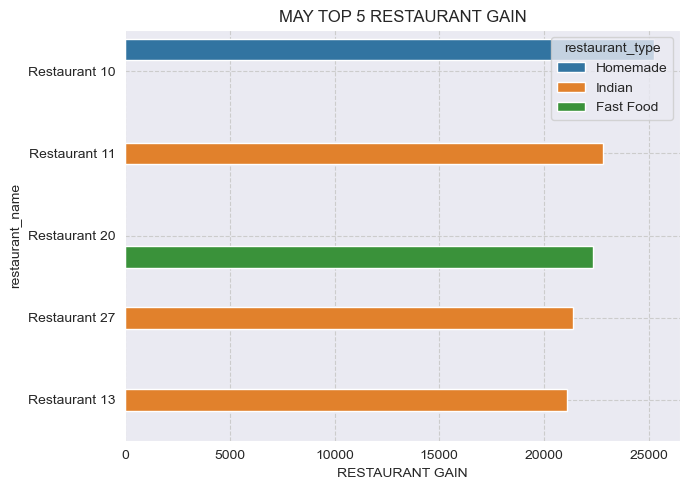

In [38]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(data=df_merge_5.head(5), x="total_order", y="restaurant_name", hue='restaurant_type', ci=None, orient='h')
plt.title('MAY TOP 5 RESTAURANT GAIN')
plt.xlabel('RESTAURANT GAIN')
plt.tight_layout()
plt.grid(True)
plt.show()

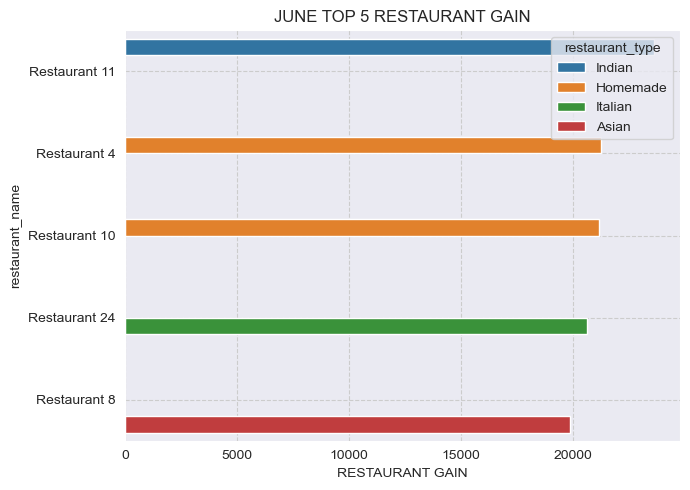

In [39]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(data=df_merge_6.head(5), x="total_order", y="restaurant_name", hue='restaurant_type', ci=None, orient='h')
plt.title('JUNE TOP 5 RESTAURANT GAIN')
plt.xlabel('RESTAURANT GAIN')
plt.tight_layout()
plt.grid(True)
plt.show()

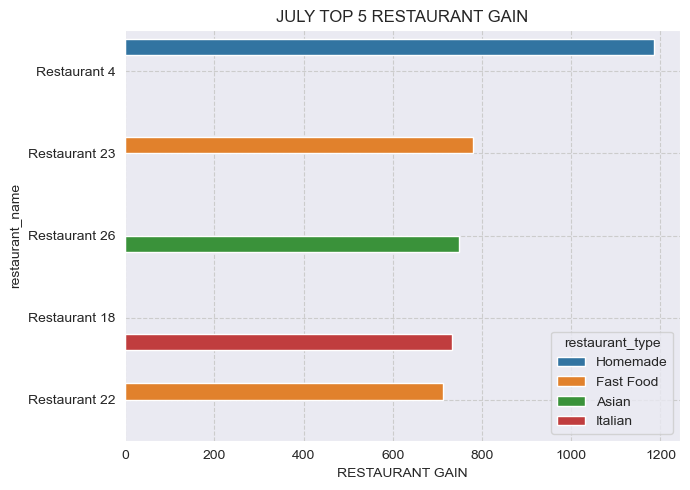

In [40]:
plt.figure(figsize=(7,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.barplot(data=df_merge_7.head(5), x="total_order", y="restaurant_name", hue='restaurant_type', ci=None, orient='h')
plt.title('JULY TOP 5 RESTAURANT GAIN')
plt.xlabel('RESTAURANT GAIN')
plt.tight_layout()
plt.grid(True)
plt.show()

 - Dari data keuntungan perbulan dapat disimpulkan bahwa restaurant dengan tipe 'Homemade' menjadi restaurant dengan presentase keuntungan tertinggi. Hal tersebut dibuktikan dengan restaurant bertipe 'Homemade' memiliki rata-rata keuntungan tertingi hampir disetiap bulan
 - Dengan berdasarkan data tersebut dapat menjadi pertimbangan untuk pihak yang ingin membuka bisnis retaurant baru bahwa restaurant bertipe 'Homemade' menjadi pilihan terbaik jika menginginkan ROI yang lebih singkat (dibanding tipe yang lain)
 - Data tersebut juga menunjukkan bahwa restaurant 11 hampir selalu berada di top 5. Restaurant 11 berada di kota Herzelia dimana kota tersebut merupakan pusat kota bisnis (entrepreneurial area, robust start-up center, ambassadors' residences, companies headquarters and houses of prominent Israeli business people) sehingga sangat masuk akal apabila banyak tercatat keuntungan yang tinggi di restaurant tersebut

In [41]:
df7_rescit_gb = df7_rescit.groupby('city')['restaurant_name'].nunique().reset_index()

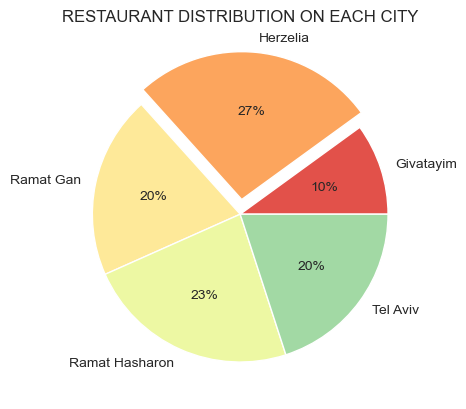

In [42]:
palette_color = sns.color_palette("Spectral")
  
plt.pie(df7_rescit_gb['restaurant_name'], labels=df7_rescit_gb['city'], colors=palette_color, autopct='%.0f%%', explode = (0, 0.1, 0, 0, 0))
plt.title('RESTAURANT DISTRIBUTION ON EACH CITY')
plt.show()

 - Piechart diatas adalah data yang menguatkan teori sebelumnya bahwa herzelia merupakan kota yang maju sehingga pengusaha kuliner melihat ini sebagai peluang untuk membuka restaurant sehingga jumlah restaurant di daerah ini berjumlah lebih banyak dibanding di kota lain
 - Para pengusaha makanan percaya bahwa dengan background dan kondisi masyarakat setempat sebagaimana yang telah disebutkan sebelumnya, akan dengan mudah menjual produk mereka di kota Herzelia

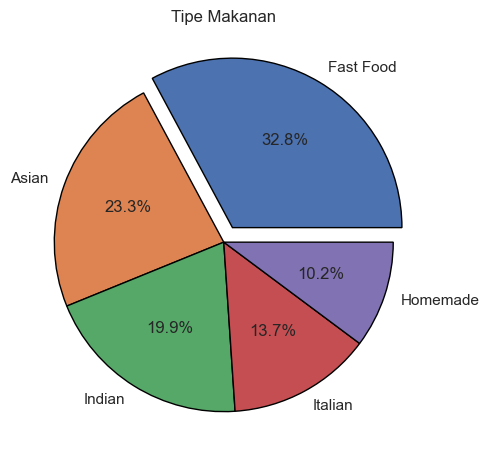

In [144]:
a=data['restaurant_type'].value_counts().reset_index()

slices = a['restaurant_type']
labels = a['index']
explode = [0.1,0,0,0,0]
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title('Tipe Makanan')
plt.tight_layout()
plt.show()

- Orang-orang yang tinggal di Kota Givatayim, Hasharon, Ramat Gan dan Tel Aviv lebih suka membeli makanan fast food, hal ini kemungkinan dilatar belakangi oleh fast food makanan murah, enak, mengenyangkan dan umumnya sangat mudah ditemui dan ringkas untuk dibawa bepergian.

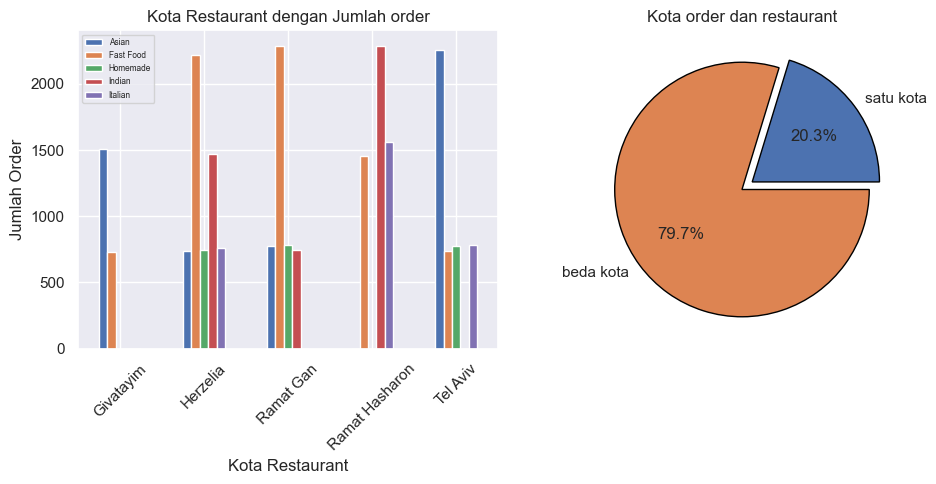

In [148]:
# Creating crosstab
crosstb = pd.crosstab(data['city_res'], data['restaurant_type'])

#perbandingan orang yang beli makanan di kotanya sendiri dan beda kota 
b=data[data['city_order']==data['city_res']]
c=data[data['city_order']!=data['city_res']]

d={'city':['satu kota', 'beda kota'], 'Jumlah':[len(b), len(c)]}
e=pd.DataFrame(d)
slices = e['Jumlah']
labels = e['city']
explode = [0.1,0]

#visualisasi
sns.set()
fig, axes = plt.subplots(1, 2, figsize = (10,5))
crosstb.plot.bar(ax = axes[0], rot=45)
axes[0].set_xlabel('Kota Restaurant')
axes[0].set_ylabel('Jumlah Order')
axes[0].set_title('Kota Restaurant dengan Jumlah order')
axes[0].legend(loc='upper left', prop={'size':6})

plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
axes[1].set_title('Kota order dan restaurant')

plt.tight_layout()
plt.show()

Dari hasil crosstab diatas dapat diketahui bahwa 
1. Kota Givatayim tidak menjual makanan homemade,Indian dan Italian 
2. Kota Hasharon tidak menjual makanan Asian dan homemade
3. Kota Ramat Gan tidak menjual makanan Italian 
4. Kota Tel Aviv tidak menjual makanan Indian 

Informasi ini dapat membantu orang-orang yang tinggal di kota Givatayim jika ingin makanan Italian dianjurkan untuk pesan di kota Herzelia, Ramat Hasharon dan Tel Aviv

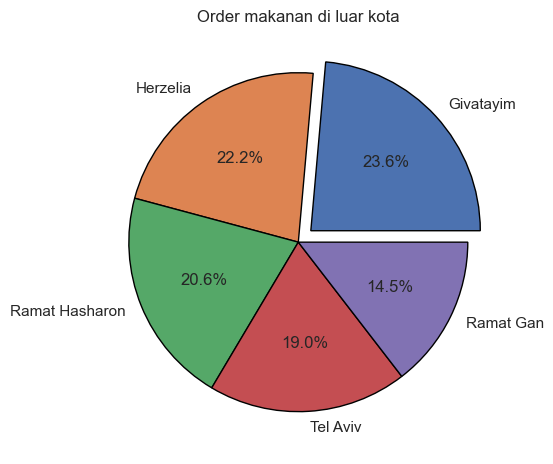

In [149]:
f=data[data['city_order']!=data['city_res']]
g=f.groupby('city_order')['city_res'].count().reset_index().sort_values(by='city_res',ascending=False)
g

# plt.style.use('fivethirtyeight')
slices = g['city_res']
labels = g['city_order']
explode = [0.1,0,0,0,0]

#visualisasi
plt.pie(slices,labels=labels,explode=explode,wedgeprops={'edgecolor':'black'},autopct='%1.1f%%')
plt.title('Order makanan di luar kota')
plt.tight_layout()
plt.show()

- Penduduk kota Givatayim paling banyak memilih membeli makanan keluar kota

### 6. Kesimpulan
1. Di 5 kota Negara Israel penduduknya dominan order makanan jenis fast food, hal ini karena fast food cepat, murah, enak, mengenyangkan, sangat mudah ditemui, beragam jenis, dan ringkas untuk dibawa bepergian.

2. Kota Givatayim hanya menjual makanan jenis asian dan fast food, sehingga penduduk yang tinggal di Kota Givatayim harus order makanan homemade, italian, dan indian di luar kota.

3. Total harga pesanan tertinggi ada dinegara Herzelia, hal ini dikarenakan jumlah restoran di Herzelia paling banyak. 

4. Secara umum, tidak terdapat perbedaan anggaran bulan yang signifikan antara pria dan wanita. Hal ini mungkin disebabkan karena penerapan aturan upah yang setara antar gender di Israel sehingga tidak terdapat perbedaan yang besar antara gaji pria dan wanita dan kami pikir ini yang menyebabkan anggaran bulanan yang tidak jauh berbeda antar kedua gender.

5. Restoran bertipe Homemade memiliki pendapatan tertinggi disebabkan karena kebanyakan menu pada restoran ini baik itu makanan jenis Keju, Daging Sapi, Vegan, dan Ayam memiliki harga yang lebih tinggi dibandingkan restoran tipe lainnya. Tinggi nya harga karena secara umum restoran bertipe homemade membuat dan menyajikan makanan lebih rumit dan eksklusif.

6. Jenis makanan yang paling banyak disajikan adalah keju. Hal ini dikarenakan keju sangat populer di Israel dan merupakan tradisi bangsa Yahudi untuk mengkonsumsi produk olahan susu terutama keju.

7. Restoran bertipe Indian sangat sedikit menjual makanan berjenis daging sapi karena mayoritas orang indian beragama Hindu dimana mereka tidak makan sapi.

8. Restoran Italian sangat sedikit menjual makanan bertipe ayam karena budaya hidangan khas Italia sangat jarang menggunakan ayam. 


### 7. Saran 
1. Agar pendapatan restauran di Kota Givatayim meningkat maka harus ditambahkan jenis makanan dengan indian, italian dan homemade.

2. Menjual makanan berbahan dasar keju sangat direkomendasikan di Israel mengingat kepopuleran keju disana.

3. Saran bagi pengusaha yang akan membuka bisnis restauran untuk membuka restauran di kota herzelia dengan tipe homemade,  mempertimbangkan restauran dengan keuntungan tertinggi bertipe homemade dan berasal dari kota herzelia.

4. Dapat membantu memberi informasi tipe restaurant sebelum orang-orang berkunjung ke kota di israel 